<a href="https://colab.research.google.com/github/wlail-iu/D590-NLP-F24/blob/main/WLail_Copy_of_HealthCareChatBot_NLP_FinalProjectPart2_Scrivner_D590_NLP_Fall24(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


































































# **NLP Final Project Part 2**

# 1. Health Care ChatBot

## Team Members

<li> Amanda Alonzo
<li> Wade Lail
<li> Edmund Zarek



# 2. Preprocessing Steps (30 pts)

All essential steps necessary for our application
<ol>
<li> Install dependencies </li>
<li> Load chatbot model </li>
<li> Load health care Q&A data from file ("train.csv") </li>
<li> Summarize answers for similar questions </li>
<li> Perform custom name entity recognition for health care terms such as symptom, side effect, treatment, and prevention.</li>
</ol>

In [ ]:
!python --version
!pip install ChatterBot2

In [ ]:
# load file for medical questions and answers that will be used to train the chatbot
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [ ]:
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16407 non-null  object
 1   Question  16407 non-null  object
 2   Answer    16407 non-null  object
dtypes: object(3)
memory usage: 384.7+ KB



# 3. Feature Extraction (30 pts)

Implement feature extraction tools and methods (term frequency, word embeddings etc)

From Question field, derive a new question_cleansed field that:
- removes stop words and punctuation
- all lower case

From Answer field, derive a new answer_cleansed field that:
- shortens the answer to 1 sentence for readability in a chat format.


In [ ]:
# remove punctuation and stop words from question and make lower case
# shorten answer to one sentence

import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# lower case and remove punctuation
df["question_cleansed"] = df["Question"].str.lower().replace(r'[^\w\s]', '', regex=True)

# remove stop words
df["question_cleansed"] = df["question_cleansed"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# shorten answer to first sentence
df["answer_cleansed"] = df["Answer"].apply(lambda x: x.split(".")[0]+'.' )

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,qtype,Question,Answer,question_cleansed,answer_cleansed
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...,risk lymphocytic choriomeningitis lcm,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...,symptoms lymphocytic choriomeningitis lcm,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...,risk lymphocytic choriomeningitis lcm,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos...",diagnose lymphocytic choriomeningitis lcm,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen...",treatments lymphocytic choriomeningitis lcm,"Aseptic meningitis, encephalitis, or meningoen..."


In [ ]:
# review some questions to test with in chat below
for index, row in df.iterrows():
  if index < 5:
    print("Q: " + row["Question"]  + " (" + row["question_cleansed"] + ")")
    print("A: " + row["answer_cleansed"] )

Q: Who is at risk for Lymphocytic Choriomeningitis (LCM)? ? (risk lymphocytic choriomeningitis lcm)
A: LCMV infections can occur after exposure to fresh urine, droppings, saliva, or nesting materials from infected rodents.
Q: What are the symptoms of Lymphocytic Choriomeningitis (LCM) ? (symptoms lymphocytic choriomeningitis lcm)
A: LCMV is most commonly recognized as causing neurological disease, as its name implies, though infection without symptoms or mild febrile illnesses are more common clinical manifestations.
Q: Who is at risk for Lymphocytic Choriomeningitis (LCM)? ? (risk lymphocytic choriomeningitis lcm)
A: Individuals of all ages who come into contact with urine, feces, saliva, or blood of wild mice are potentially at risk for infection.
Q: How to diagnose Lymphocytic Choriomeningitis (LCM) ? (diagnose lymphocytic choriomeningitis lcm)
A: During the first phase of the disease, the most common laboratory abnormalities are a low white blood cell count (leukopenia) and a low p

In [ ]:
# generate conversations.yml from our data frame
# using shorten responses
# todo: consolidate questions for improved performance (time to train is too long - 20 minutes)

yaml_lines = []
yaml_lines.append("categories:")
yaml_lines.append("- medical")
yaml_lines.append("conversations:")

for _, row in df.iterrows():
    yaml_lines.append("- - \"" + str(row["question_cleansed"]).replace('-', '').replace('"','') + "\"")
    yaml_lines.append("  - \"" + str(row["answer_cleansed"]).replace('-', '').replace('"','') + "\"")


yaml_str = "\n".join(yaml_lines)
print(yaml_str[0:10])
with open('conversations.yml', 'a') as the_file:
    the_file.write(yaml_str)

"""
sample format:

categories:
- medical
conversations:
- - what disease does a carcinogen cause
  - cancer.
- - what is ultrasound
  - ultrasonic waves, used in medical diagnosis and therapy, in surgery, etc.
- - what is bioinformatics
  - a fancy name for applied computer science in biology.
- - what is cytology
  - the study of cells.
- - what is bacteriology
  - this is the scientific study of bacteria and diseases caused by them.
- - what is botulism?
  - Botulism is a rare but serious paralytic illness caused by a nerve toxin that is produced by the bacterium Clostridium botulinum and sometimes by strains of Clostridium butyricum and Clostridium baratii. There are five main kinds of botulism. Foodborne botulism is caused by eating foods that contain the botulinum toxin. Wound botulism is caused by toxin produced from a wound infected with Clostridium botulinum. Infant botulism is caused by consuming the spores of the botulinum bacteria, which then grow in the intestines and release toxin. Adult intestinal toxemia (adult intestinal colonization) botulism is a very rare kind of botulism that occurs among adults by the same route as infant botulism. Lastly, iatrogenic botulism can occur from accidental overdose of botulinum toxin. All forms of botulism can be fatal and are considered medical emergencies. Foodborne botulism is a public health emergency because many people can be poisoned by eating a contaminated food.
- - what are marine toxins?
  - Marine toxins are naturally occurring chemicals that can contaminate certain seafood. The seafood contaminated with these chemicals frequently looks, smells, and tastes normal. When humans eat such seafood, disease can result.



"""



categories


'\nsample format:\n\ncategories:\n- medical\nconversations:\n- - what disease does a carcinogen cause\n  - cancer.\n- - what is ultrasound\n  - ultrasonic waves, used in medical diagnosis and therapy, in surgery, etc.\n- - what is bioinformatics\n  - a fancy name for applied computer science in biology.\n- - what is cytology\n  - the study of cells.\n- - what is bacteriology\n  - this is the scientific study of bacteria and diseases caused by them.\n- - what is botulism?\n  - Botulism is a rare but serious paralytic illness caused by a nerve toxin that is produced by the bacterium Clostridium botulinum and sometimes by strains of Clostridium butyricum and Clostridium baratii. There are five main kinds of botulism. Foodborne botulism is caused by eating foods that contain the botulinum toxin. Wound botulism is caused by toxin produced from a wound infected with Clostridium botulinum. Infant botulism is caused by consuming the spores of the botulinum bacteria, which then grow in the inte

In [ ]:
from chatterbot import ChatBot

# setup and configure the bot
# don't save conversations for privacy(due to HIPAA for sensitive health care data)
bot = ChatBot('Doctor',   read_only=True)

# Create object of ChatBot class with Storage Adapter
bot = ChatBot(
    'Doctor',
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    database_uri='sqlite:///database.sqlite3'
)

# Create object of ChatBot class with Best Match Adapter
bot = ChatBot(
    'Doctor',
    logic_adapters=[
        'chatterbot.logic.BestMatch'
        ],
)

In [ ]:
from chatterbot.trainers import ChatterBotCorpusTrainer

# train chatbot on our data using yml file generated above
# this takes a few minutes

trainer = ChatterBotCorpusTrainer(bot)

trainer.train("/content/conversations.yml")

Training conversations.yml: [####################] 100%


In [ ]:
!pip show chatterbot2

Name: ChatterBot2
Version: 1.1.0a7
Summary: ChatterBot is a machine learning, conversational dialog engine.
Home-page: https://github.com/gunthercox/ChatterBot
Author: Gunther Cox
Author-email: gunthercx@gmail.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: mathparse, python-dateutil, pytz, sqlalchemy
Required-by: 


In [ ]:
# set up sentiment analysis for
# proper response to initial chat question of "how do you feel?"
!pip install nltk

import nltk
nltk.download("punkt")
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# test sentiment analysis results
print(sid.polarity_scores("I feel horrible."))

print(sid.polarity_scores("I feel fine."))

print(sid.polarity_scores("my spouse feels sick."))

{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


In [ ]:

print(sid.polarity_scores("I feel sick.")['neg']>sid.polarity_scores("I feel sick.")['pos'] )

True


In [ ]:
#  TBD: will use if our app needs any similarity scores
#similarity score of user entered question to data question cleansed
"""
!pip install spacy
import spacy

nlp = spacy.load("en_core_web_sm")


doc1=nlp("diabetes")
doc2=nlp("what is diabetes?")
t1=doc1[0]
t2=doc2[2]
print(f"sim betw {t1} and {t2} = ", round(t1.similarity(t2),3))
print(f"sim betw {doc1} and {doc2} = ", round(doc1.similarity(doc2),3))
"""


thanks


In [ ]:
# Testing the bot with fixed inputs
# Get a response to the input text for testing
test_input =  'What is botulism?'
response = bot.get_response(test_input)

print("Input:", test_input)
print("Bot Response:", response)

test_input =   'What are marine toxins?'
response = bot.get_response(test_input)

print("Input:", test_input)
print("Bot Response:", response)

Input: What is botulism?
Bot Response: risk marburg hemorrhagic fever marburg hf
Input: What are marine toxins?
Bot Response: Marine toxins are naturally occurring chemicals that can contaminate certain seafood.


In [ ]:
# Get a response to the input text
test_input =  'bacteriology'
response = bot.get_response(test_input)

print("Input:", test_input)
print("Bot Response:", response)

test_input =  'toxins'
response = bot.get_response(test_input)

print("Input:", test_input)
print("Bot Response:", response)

Input: bacteriology
Bot Response: BuschkeOllendorff syndrome results from mutations in the LEMD3 gene.
Input: toxins
Bot Response: Marine toxins are naturally occurring chemicals that can contaminate certain seafood.


In [ ]:
test_input =  'how to prevent parasites - cysticercosis'
response = bot.get_response(test_input)

print("Input:", test_input)
print("Bot Response:", response)

test_input =  'risk lymphocytic choriomeningitis'
response = bot.get_response(test_input)

print("Input:", test_input)
print("Bot Response:", response)




Input: how to prevent parasites - cysticercosis
Bot Response: Cysticercosis is an infection caused by the larvae of the tapeworm, Taenia solium.
Input: risk lymphocytic choriomeningitis
Bot Response: LCMV infections can occur after exposure to fresh urine, droppings, saliva, or nesting materials from infected rodents.


# 4. Main Functionality (30 pts)

This is our main task of interacting with robo chat about  medical information.

<ol>
<li> Obtain medical nature acknowledgements from user.
<li> For all subsequent steps, identify keywords for mental health issues and add to response.
<li> Ask use how they feel for conversastional tone. Obtain adjective using NER and assess sentiment analysis for response.
<li> Obtain question from user
<li> Find similarity score of most similar question
<li> Show answer
<li> Ask for more information or new question
<li> Repeat for all questions
<li> Ask for any topic user would like summary about
<li> Before exiting, remind them to defer to advice from health care provider and contact health care professional as needed.


In [ ]:
# Get users name
# Provide medical disclaimers
# Ask how they feel
# get one or more questions and provide response
# when user enters bye or thanks, no more questions
# provide boilerplate exit message with medical provider details

import re

name = input("What is your name? ")
print("Welcome to the Dr. Bot Service! For medical emergencies, please dial 911.")
print("Please say Bye or Thanks before you leave.")
print("How do you feel?")
request=input(name+':')

# Check if they are feeling sick or fine and customize response accordingly

if sid.polarity_scores(request)['neg']>sid.polarity_scores(request)['pos']:
  print('Dr. Bot:',"I'm sorry you don't feel well. What would you like to know more about?")
else:
  print('Dr. Bot:',"I'm glad you feel well. What would you like to know more about?")

while True:
    request = input(name+': ')

    # remove punctuation and lower case the request
    # todo: remove stopwords

    clean_request = re.sub(r'[^\w\s]', '', request.lower())

    if clean_request  =='bye' or  clean_request =="thanks":
        print('Dr. Bot: Thanks for chatting with me! Please visit the patient portal for followup appointments and to refill any meds.')
        break

    else:

        response = bot.get_response(clean_request)
        print('Dr. Bot:',response)

What is your name? Amanda
Welcome to the Dr. Bot Service! For medical emergencies, please dial 911.
Please say Bye or Thanks before you leave.
How do you feel?
Amanda:I feel fine
Dr. Bot: I'm glad you feel well. What would you like to know more about?
Amanda: Diabetes
Dr. Bot: Too Much Glucose in the Blood Diabetes means your blood glucose (often called blood sugar) is too high.
Amanda: cholesterol
Dr. Bot: Hypercholesterolemia is a condition characterized by very high levels of cholesterol in the blood.
Amanda: stress
Dr. Bot: Everyone feels stressed from time to time.
Amanda: thanks
Dr. Bot: Thanks for chatting with me! Please visit the patient portal for followup appointments and to refill any meds.


# 5. Personal Contribution Statement (10 pts)


####Summary of tasks and team members' contributions

<br>

<table>
<tr><td><b>Task</b></td><td><b>Team Member(s)</b></td><td><b> Contribution</b></td> </tr>
<tr><td>Learn Web Applications</td><td>Ed</td> <td>Flask Proof of Concept in VS Code</td>
</tr>
<tr><td>Data</td><td>Amanda</td> <td>Review Health Care Free/Public Data Sources</td></tr>
<tr><td>Develop Colab Notebook</td><td>Amanda</td> <td>Research Chatterbox</td></tr>
<tr><td>Develop Web Applications</td><td>Amanda</td> <td>Flask Proof of Concept Deployment to Render</td></tr>
<tr><td>Communicate Project Requirements</td><td>Wade</td> <td>Obtain information from T.A. </td></tr>
</table>


---


#### **Amanda Alonzo Personal Statement**

I researched chatbots using huggging face and found that alghouth powerful, loading the models for transfer learning was time consuming and perhaps too much processing for our use case because we have our own more isolated body of questions and answers to utilize.

The chatterbot package provides a more lightweight option that can load quickly and be custom trained with our data as a corpus. I tried to train the chatterbot using basic text, but this had the limitation of a maximum of 1,000,000 characters that our data set exceeded. Also, it seemed to be limited to chronological or sequential conversational order. Whereas our use case is a body of questions and answers that someone may ask any question not in a specific order.

Therefore, I tried to train the chatterbot using a yaml document that explicitly states what the user may enter and what the bot can respond as to support any sequence of questions.

Due to the nature of health care data, I chose to configure the bot as read only so that any sensitive information the person enters will not be saved. This allows for removal of any PHI or sensitive information for HIPAA that we wanted to support.

Although rule-based systems have limited scalability, for the case of health care, we wanted to provide some more structure and explicit rules. To do this, we opted for acknowledgements prior to using for medical emergencies and consulting an actual doctor.

Lastly, I researched web application frameworks by doing the Flask tutorial and setup the github and Heroku account to prepare for deployment.

---


#### **Wade Lail Personal Statement**

I learned how to create and activate virtual environments and to resolve incompatible dependency versions as well as to capture the successful dependency combinations in a requirements.txt document using freeze command.  

I went on to learn how to make an elementary web page on the localhost, passing test data to it using Flask.  Among the many things I expected to learn in that process, I also learned how to resolve as issue with “localhost refused to connect" on Windows 10.  I had to update the Windows Execution Policy to allow connectivity between the application and the localhost to finally achieve the desired outcome.  

I am continuing to learn more advanced techniques for building webapps to support our chatbot project and I’m collaborating with the team in the process of porting the team’s current Proof of Concept chatbot from Google Colab to Visual Studio Code.  

I also did some preliminary research on medical chatbots and other possible datasets in the hopes of finding options that could extend our reach beyond the current rule-based proof of concept, but I have not found anything yet to get us past the data and processing resource constraints Amanda mentioned in her personal statement.

---


#### **Ed Zarek Personal Statement**

The initial research of our chatbot centered around the Python chatterbot package. It already has a simple corpus of question and answers for various disciplines such as sports, trivia, and simple greetings and conversations. Due to the age of the package and the length of time since significant updates, we encountered some issues using the original chatterbot installation. The chatterbot2 package runs fine in a Google colab environment. We did notice issues with chatterbot2 which prevented access to the corpus available on the github site. This roadblock was circumvented by directly downloading the .yml files to the local colab environment. Flask was then introduced as a web hosting service for the chatterbot backend.

We encountered many challenges in getting flask to work in the Google colab environment. The Google colab environment is a virtual machine but it does not allow access to the localhost. The Python flask-ngrok package will expose us to a public url. Installing ngrok requires activating an account at ngrok and receiving an authorization token which needs to be input every time the application is run. This approach did not work as planned and error messages indicated that to use the service additional paid subscriptions were necessary. A quick pivot was made to another solution that allowed for the deployment and testing of a POC chatbot using chaterbot2 and flask. The following code will render a web page in colab. The notebook can be accessed at the following link:


```
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))
```
[Colab Notebook](https://colab.research.google.com/drive/1U3Zw9eBQYpOfuuY1SiLkXpHIOWdpdiA9?usp=sharing)

Once the chatbot with flask POC proved its efficacy in colab, the next step was to migrate the script and files to VS code. This step has proven to be problematic as the virtual environment requires the correct code versions of the critical packages. This has led to dependency resolutions errors as a result of collisions between various package versions during the installation process. This is currently an active area of research and testing.

There are a multitude of challenges to overcome when organically developing a chatbot GUI. The first issue is identifying the proper vehicle to deliver the app. Do you use a pre-built application package like streamlit or utilize an existing set of html and css style sheets? The streamlit package will provide an easily configurable set of widgets to produce a professional looking tool without the need to research html page construction. The only draw back with that apporoach is the time to research and code a new chatbot interface. The benefit is that you can develop a clean GUI rather easily. Although existing tutorials of HTML and CSS style sheets are prevalent on the web, they may not produce the exact look desired and will require additional tweaking of the code base to produce a desirable outcome. The other issue with streamlit is that it is another application which needs to be connected to flask in the app.py script file.

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Flask chatbot screen capture.PNG to Flask chatbot screen capture (1).PNG


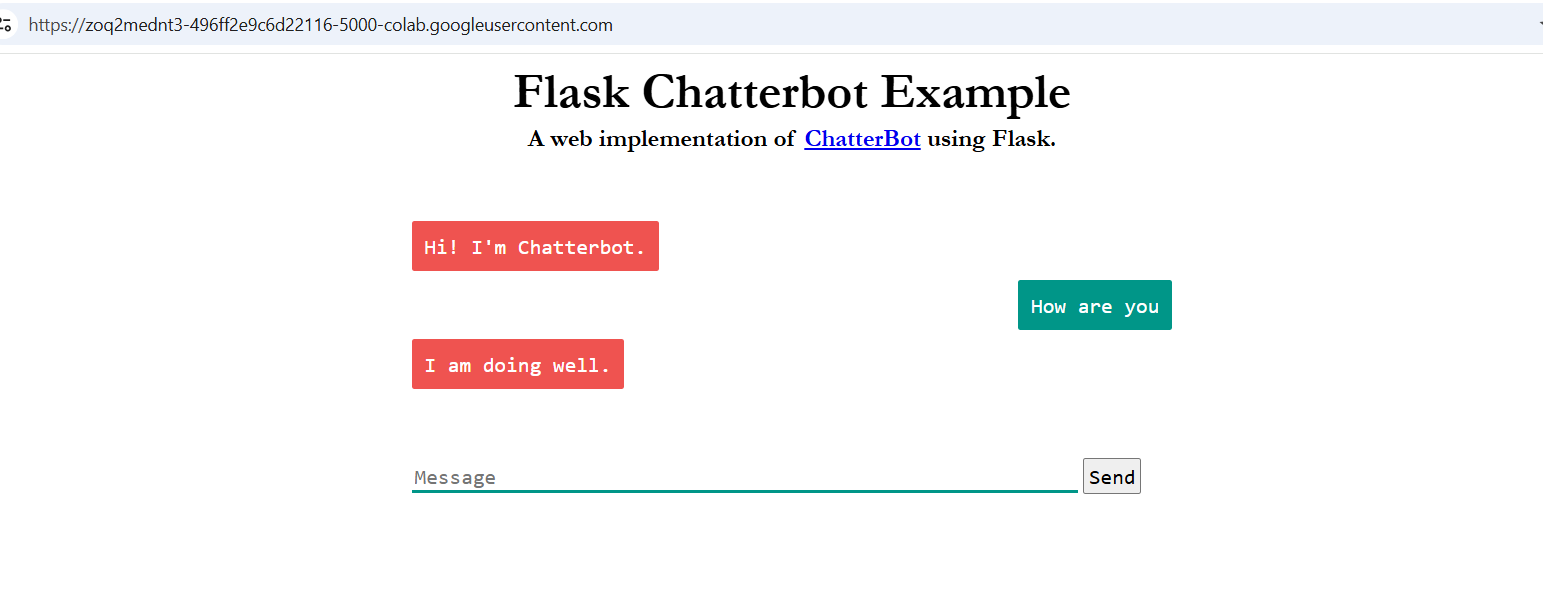

In [ ]:
Image('Flask chatbot screen capture.PNG')

# Next Steps for Web Application

### Proof of Concept 1:
#### Basic Chatbot Flask App Running Locally with VS Code

Code location:
https://github.com/aeaiu/med_chat/tree/main/Flask-master



---



### Proof of Concept 2:
#### Basic "Hello World" Flask App Hosted on Render

https://app3-1-y3hk.onrender.com



---

### Prototype Development
#### Basic Chatbot on Render (will continue adding functionality for final project)

https://med-chat-h76t.onrender.com

---



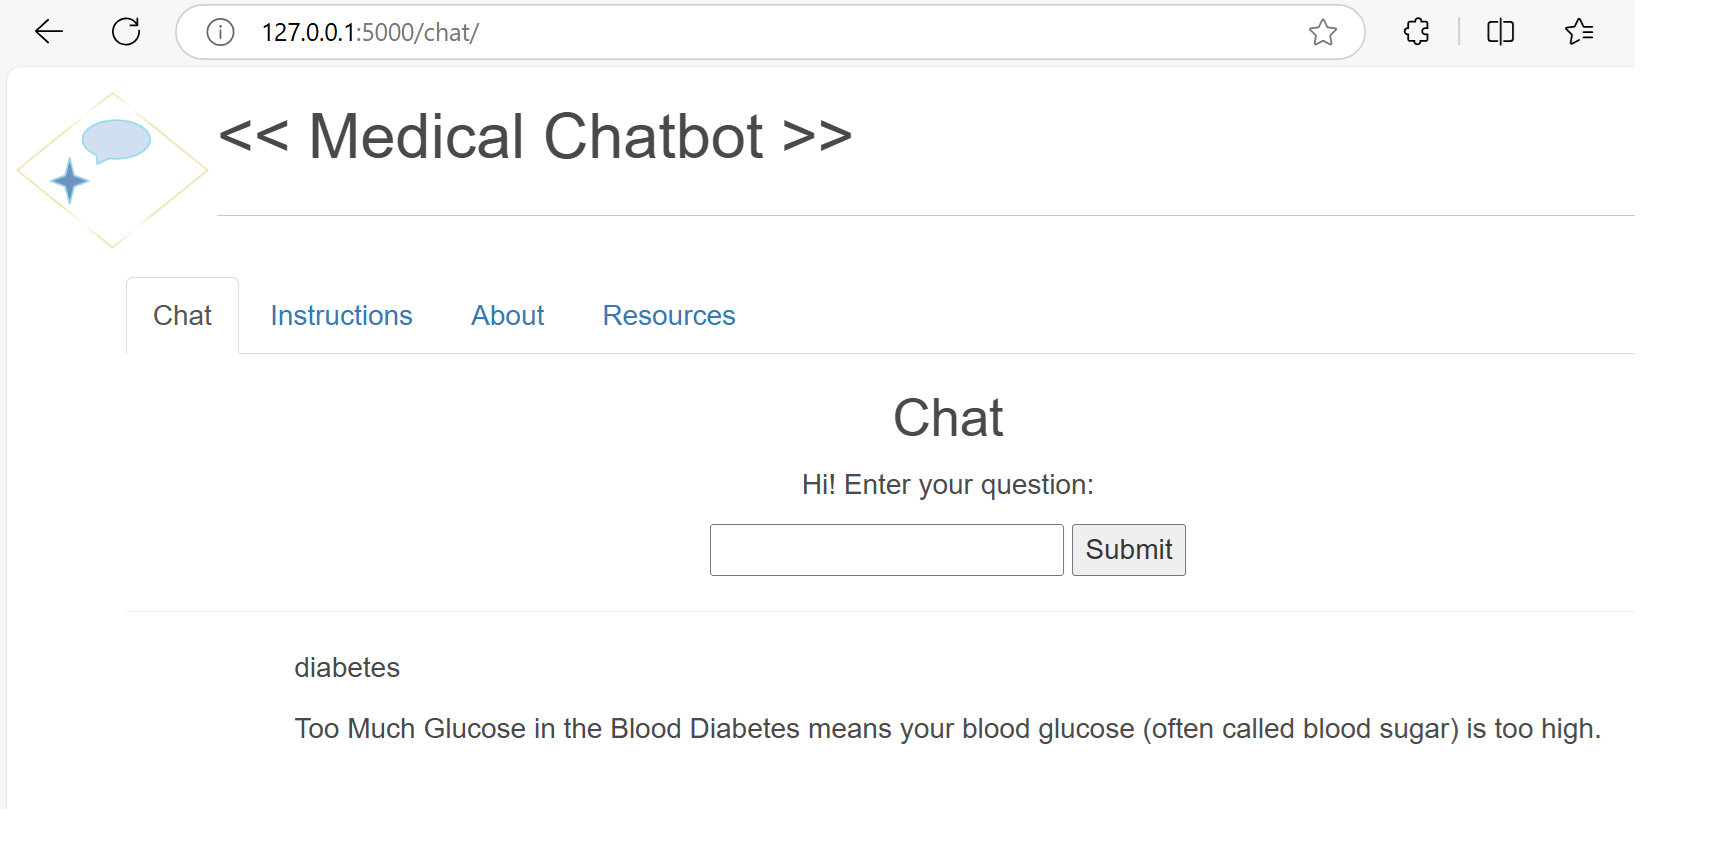

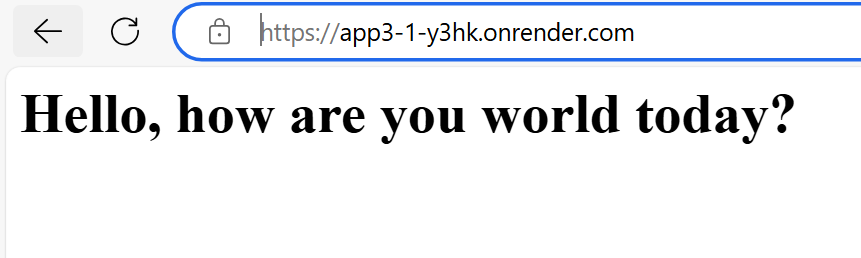


## Resources

https://www.datacamp.com/tutorial/building-a-chatbot-using-chatterbot

https://pypi.org/project/ChatterBot2/

https://hackernoon.com/using-flask-to-build-a-rule-based-chatbot-in-python

https://github.com/chamkank/flask-chatterbot/tree/master

https://github.com/gunthercox/ChatterBot

https://github.com/gunthercox/chatterbot-corpus

https://deveshsurve.medium.com/running-flask-app-with-google-colab-c9f0c078fb53

https://www.geeksforgeeks.org/how-to-run-flask-app-on-google-colab/

https://docs.streamlit.io/develop/tutorials/llms/build-conversational-apps

## Data:

Health Care Q & A

https://www.kaggle.com/datasets/thedevastator/comprehensive-medical-q-a-dataset/data

Medication Side Effects


https://www.kaggle.com/datasets/jithinanievarghese/drugs-side-effects-and-medical-condition

